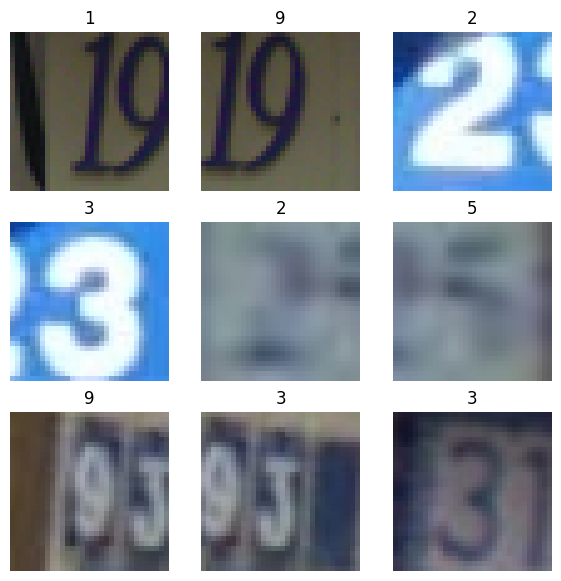

(73257, 32, 32, 3)
(73257,)
(26032, 32, 32, 3)
(26032,)
Epoch 1/6
573/573 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - loss: 1.9658 - sparse_categorical_accuracy: 0.2842 - val_loss: 1.3842 - val_sparse_categorical_accuracy: 0.5313
Epoch 2/6
573/573 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - loss: 1.3024 - sparse_categorical_accuracy: 0.5394 - val_loss: 0.9898 - val_sparse_categorical_accuracy: 0.6807
Epoch 3/6
573/573 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - loss: 1.0621 - sparse_categorical_accuracy: 0.6405 - val_loss: 0.8207 - val_sparse_categorical_accuracy: 0.7246
Epoch 4/6
573/573 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - loss: 0.9494 - sparse_categorical_accuracy: 0.6845 - val_loss: 0.7318 - val_sparse_categorical_accuracy: 0.7558
Epoch 5/6
573/573 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - loss: 0.8757 - sparse_categorical_accuracy: 0.7234 - val_loss: 0.6804 - val_sparse_categorical_accuracy: 0.8004
Epoch 6/6
573/573 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - loss: 0.8091 - sparse_categorical_accuracy: 0.7627 - v

In [37]:
import tensorflow as tf
import numpy as np
width = 224
height = 224

data_X_train = np.load("data/X_train.npy")
data_y_train = np.load("data/y_train.npy")
data_X_test = np.load("data/X_test.npy")
data_y_test = np.load("data/y_test.npy")

# TODO
# Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(32, 32, 3)),
#    tf.keras.layers.Resizing(width, height, pad_to_aspect_ratio = True, fill_mode='constant', fill_value=0.0),
#    tf.keras.layers.Rescaling(scale = 1./255),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)
X_train = np.transpose(data_X_train, (3,0,1,2))
y_train = data_y_train.reshape(-1)
X_test = np.transpose(data_X_test, (3,0,1,2))
y_test = data_y_test.reshape(-1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
ds_train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
ds_test = tf.data.Dataset.from_tensor_slices((X_test, y_test))
ds_train = ds_train.shuffle(buffer_size=10000).batch(128).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.batch(128).prefetch(tf.data.AUTOTUNE)

# Train and validate

model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

In [38]:
test_loss, test_accuracy = model.evaluate(ds_test)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.6138 - sparse_categorical_accuracy: 0.8314
Test loss: 0.6138 accuracy: 0.8314
